In [8]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from datetime import datetime

In [2]:
working_with_dummies = False

In [3]:
trn_dataset_with_preprocessing_path = r'../utilfiles/train_test_val_files/train_set_noNulls.csv'
val_dataset_with_preprocessing_path = r'../utilfiles/train_test_val_files/val_set_noNulls.csv'
test_dataset_with_preprocessing_path = r'../utilfiles/train_test_val_files/test_set_noNulls.csv'


trn_dataset_with_dummies_path = r'../utilfiles/train_test_val_files/train_set_with_dummies.csv'
val_dataset_with_dummies_path = r'../utilfiles/train_test_val_files/val_set_with_dummies.csv'
test_dataset_with_dummies_path = r'../utilfiles/train_test_val_files/test_set_with_dummies.csv'


if(working_with_dummies):
    trn_file_path = trn_dataset_with_dummies_path
    val_file_path = val_dataset_with_dummies_path
    test_file_path = test_dataset_with_dummies_path
else:
    trn_file_path = trn_dataset_with_preprocessing_path
    val_file_path = val_dataset_with_preprocessing_path
    test_file_path = test_dataset_with_preprocessing_path

In [9]:
full_train_df = pd.read_csv(trn_file_path)
reduced_train_df = full_train_df.sample(frac=0.4, random_state=42)
current_year = datetime.now().year
reduced_train_df['age'] = current_year - reduced_train_df['34-0.0']
X_train = reduced_train_df.drop(columns=['eid', 'target', '34-0.0'])
y_train = reduced_train_df['target']
del full_train_df

In [11]:
feature_names = X_train.columns.to_list()

In [12]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=feature_names)

In [13]:
params = {
    'max_depth' : 9,
    'learning_rate': 0.0025,
    'subsample': 0.9,
    'colsample_bytree': 0.6,
    'min_child_weight' : 3,
    'reg_alpha' : 0.8,
    'reg_lambda' : 2,
    'scale_pos_weight': (len(y_train)-sum(y_train)) / sum(y_train),
    'eval_metric': 'auc'
}

In [14]:
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

## ***Shap***

In [15]:
feature_names_df = pd.read_csv(r'../utilfiles/codes_after_reduction.csv')

feature_name_map = pd.Series(feature_names_df.description.values, index=feature_names_df.codes).to_dict()

def find_original_code(target_string,prefixes):
    for prefix in prefixes:
        if target_string.startswith(prefix):
            return prefix

def convert_feature_code_to_name(feature_code):
    code_founded = find_original_code(feature_code,feature_names)
    return feature_name_map.get(code_founded, code_founded) + ' - ' + code_founded

In [16]:
explainer = shap.TreeExplainer(model)

In [17]:
shap_values = explainer(dtrain)

In [21]:
RealFeatureNames = [convert_feature_code_to_name(code) for code in feature_names if code != 'age'] + ['age']

In [22]:
shap_values.feature_names = RealFeatureNames

/home/nirpr@mta.ac.il/bioEnv/lib/python3.10/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


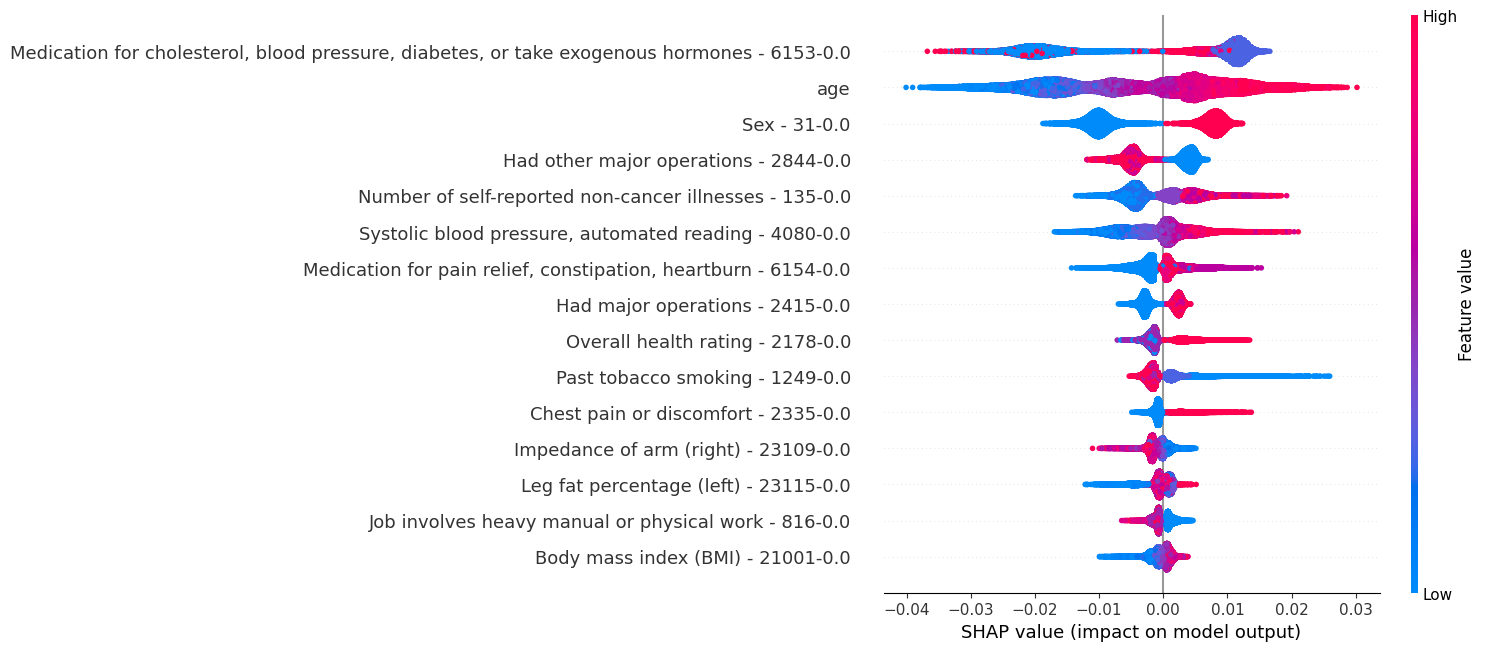

In [23]:
shap.summary_plot(shap_values,X_train, max_display=15,feature_names=RealFeatureNames)

/home/nirpr@mta.ac.il/bioEnv/lib/python3.10/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


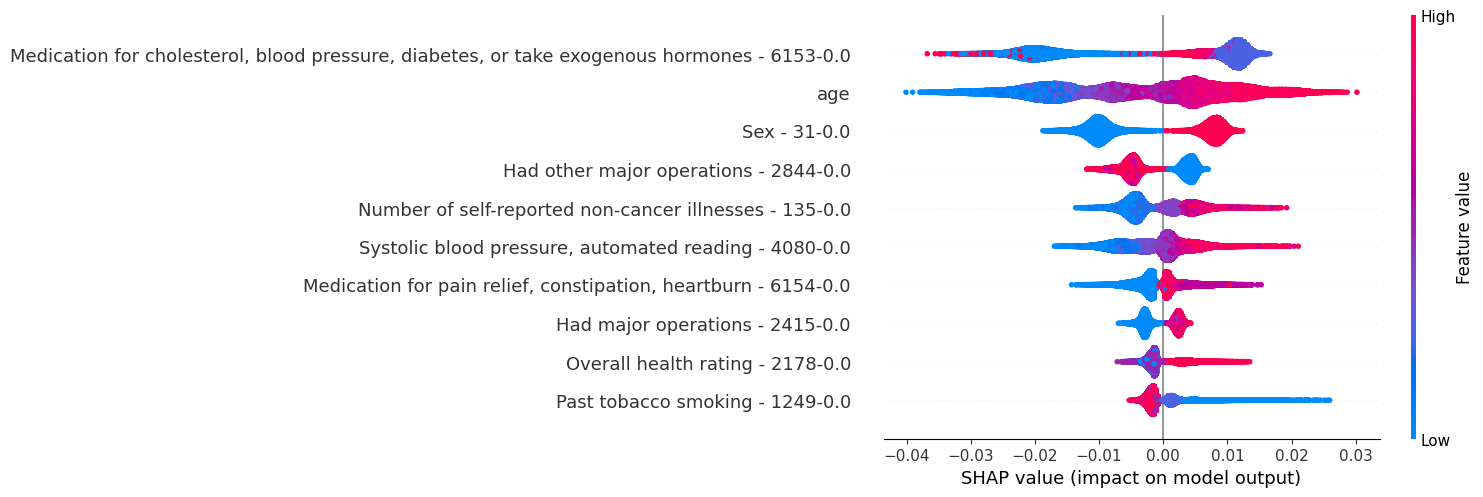

In [24]:
shap.summary_plot(shap_values,X_train, max_display=10,feature_names=RealFeatureNames)

/home/nirpr@mta.ac.il/bioEnv/lib/python3.10/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


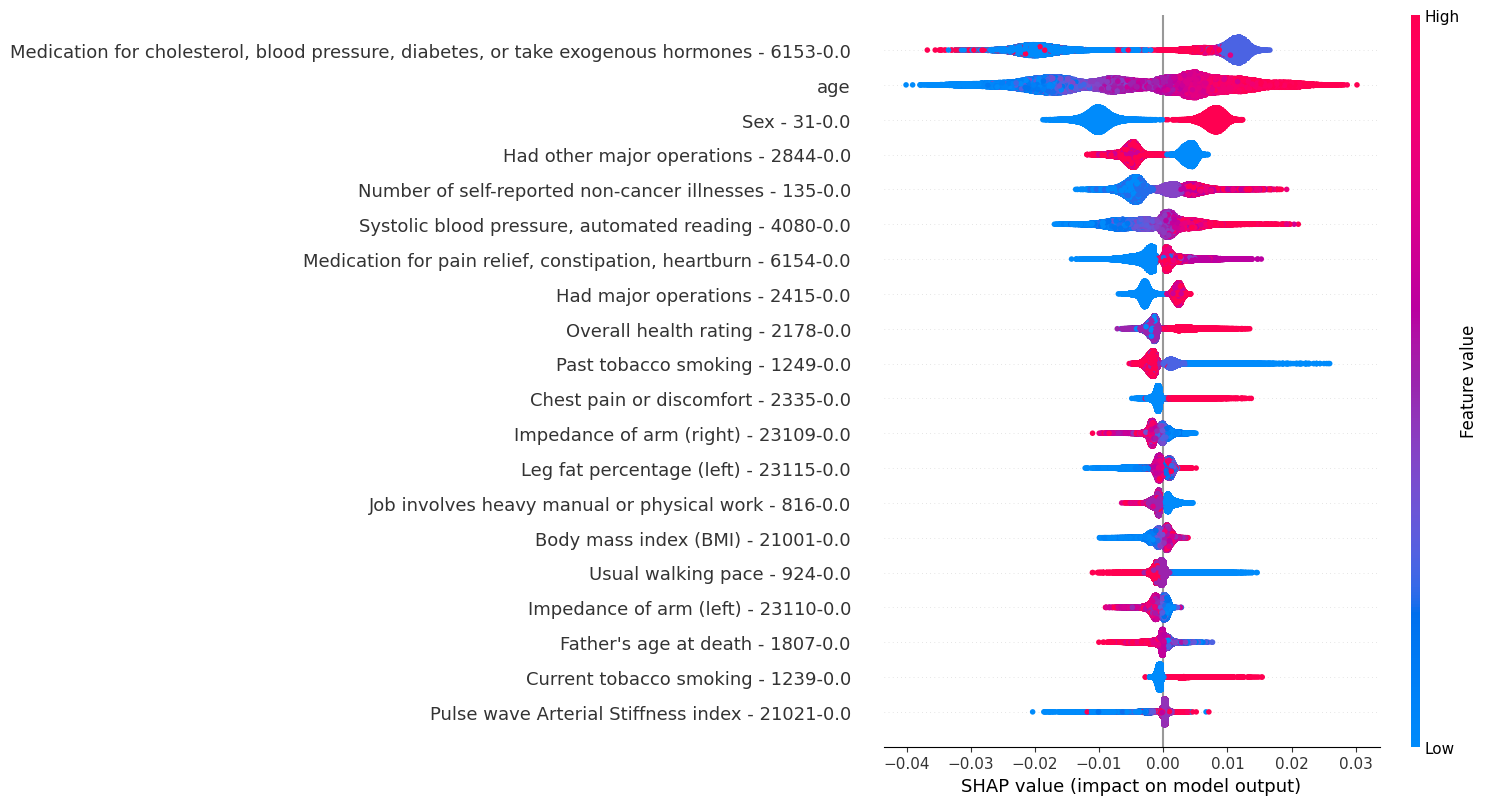

In [25]:
shap.summary_plot(shap_values,X_train, max_display=20,feature_names=RealFeatureNames)

/home/omerkr@mta.ac.il/bioEnv/lib/python3.10/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


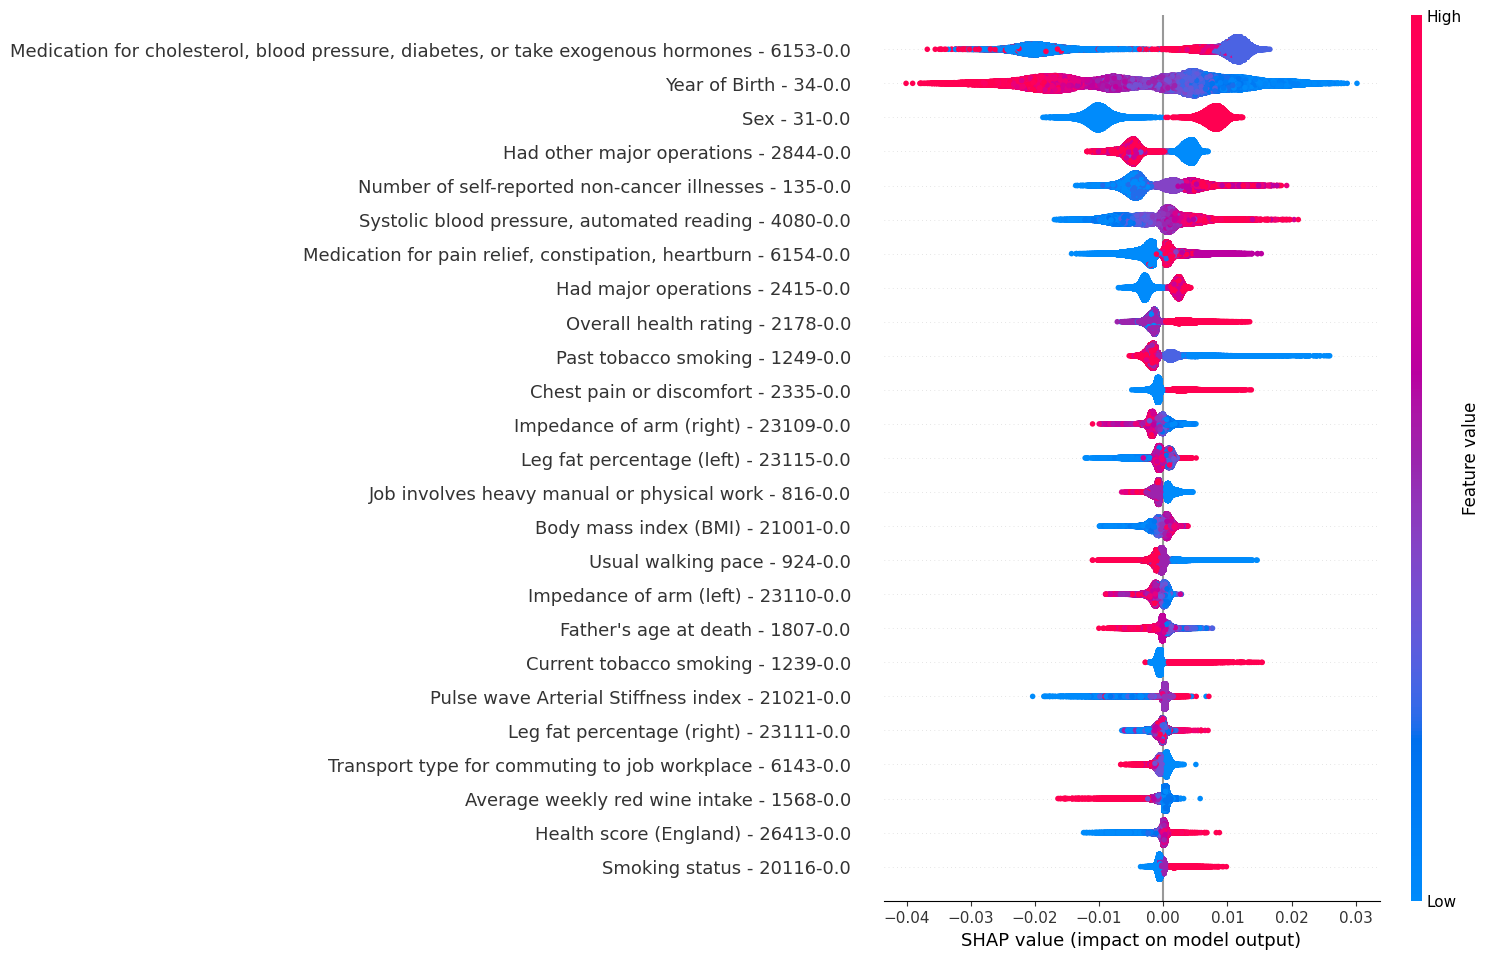

In [27]:
shap.summary_plot(shap_values,X_train, max_display=25,feature_names=RealFeatureNames)

/home/omerkr@mta.ac.il/bioEnv/lib/python3.10/site-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


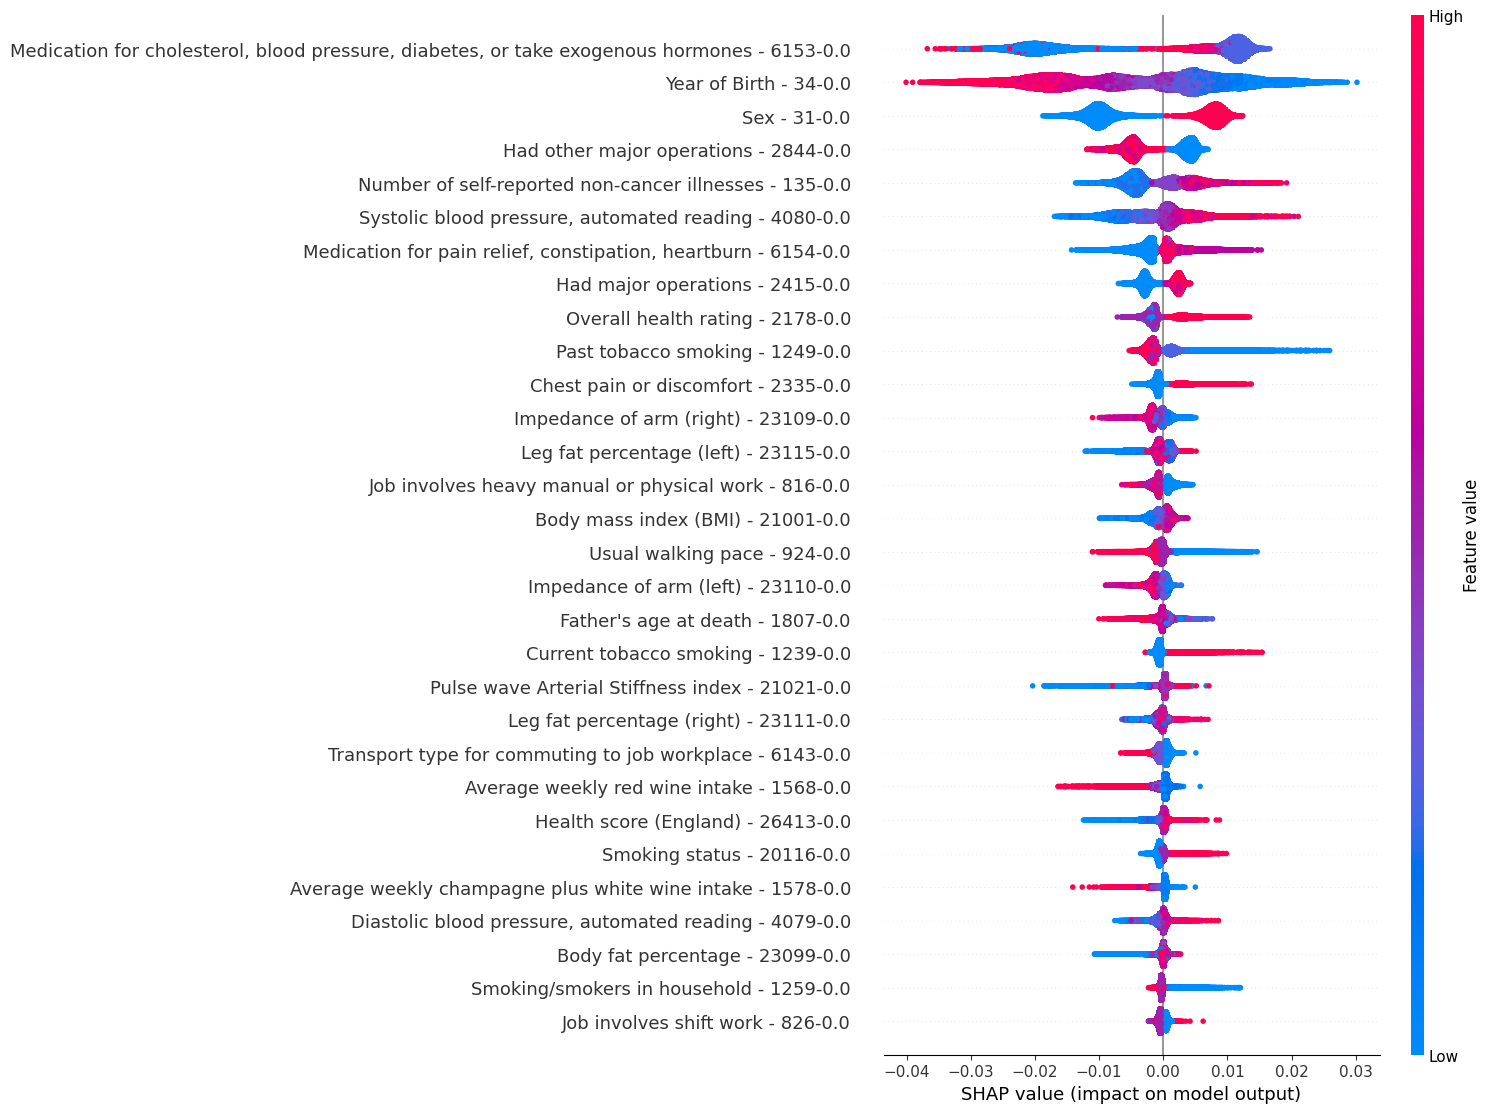

In [28]:
shap.summary_plot(shap_values,X_train, max_display=30,feature_names=RealFeatureNames)